**Import the required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

**Loading the Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/All_Diets.csv')
df.head(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
5,paleo,Paleo Shrimp-Stuffed Mushrooms recipes,mediterranean,68.62,34.15,42.44,2022-10-16,17:20:09
6,paleo,Paleo Pumpkin Pie recipes,american,30.03,275.88,97.68,2022-10-16,17:20:09
7,paleo,Autoimmune Paleo Pesto,italian,4.25,14.15,72.90,2022-10-16,17:20:09
8,paleo,Baked Banana Chip Encrusted French Toast,french,152.88,1874.52,385.80,2022-10-16,17:20:09
9,paleo,Vietnamese Pho Pressure Cooker (Noodle Soup),south east asian,602.91,274.87,400.01,2022-10-16,17:20:09


**EDA Analysis**

In [5]:
df = df.drop(columns=['Extraction_time'])
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16
...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diet_type       7806 non-null   object 
 1   Recipe_name     7806 non-null   object 
 2   Cuisine_type    7806 non-null   object 
 3   Protein(g)      7806 non-null   float64
 4   Carbs(g)        7806 non-null   float64
 5   Fat(g)          7806 non-null   float64
 6   Extraction_day  7806 non-null   object 
dtypes: float64(3), object(4)
memory usage: 427.0+ KB


In [7]:
df.dtypes

,0
Diet_type,object
Recipe_name,object
Cuisine_type,object
Protein(g),float64
Carbs(g),float64
Fat(g),float64
Extraction_day,object


In [8]:
df.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


In [9]:
df = df[df['Cuisine_type'] != 'world']

**Data Visualization**

<ipython-input-10-0b534e0c2502>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diet_type', y='Protein(g)', data=grouped_df, palette="Blues")


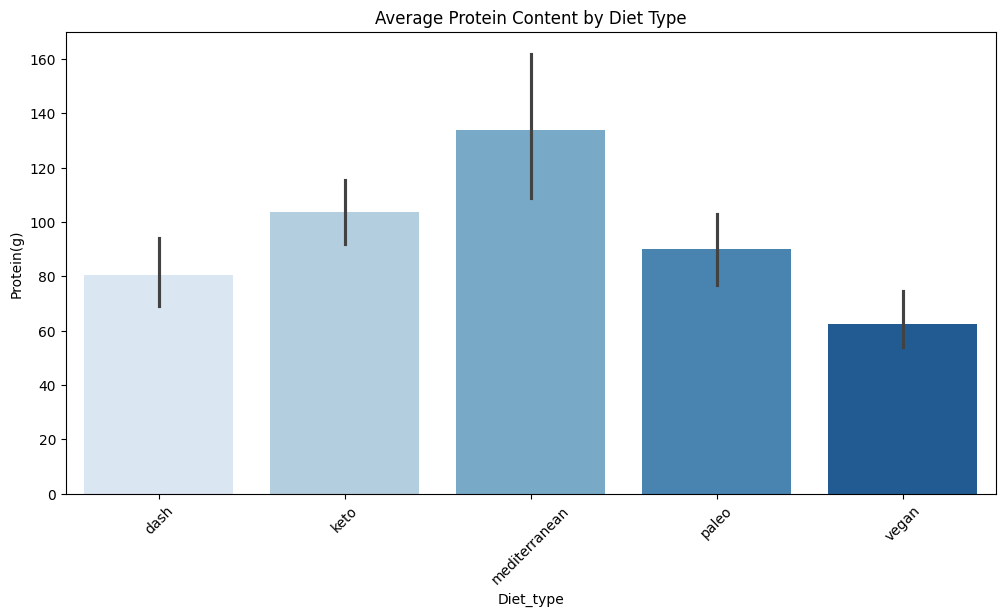

In [10]:
df = df.dropna(subset=['Protein(g)', 'Carbs(g)', 'Fat(g)'])

# Analyze the distribution of macronutrients by Diet Type and Cuisine Type
# Group the data by 'Diet_type' and 'Cuisine_type' and calculate the mean of macronutrients
grouped_df = df.groupby(['Diet_type', 'Cuisine_type'])[['Protein(g)', 'Carbs(g)', 'Fat(g)']].mean().reset_index()

# Set up the plot aesthetics
plt.figure(figsize=(12, 6))

# Bar chart: Mean protein, carbs, and fat by diet type
sns.barplot(x='Diet_type', y='Protein(g)', data=grouped_df, palette="Blues")
plt.title('Average Protein Content by Diet Type')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-f04cd9b5cafd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diet_type', y='Carbs(g)', data=grouped_df, palette="Greens")


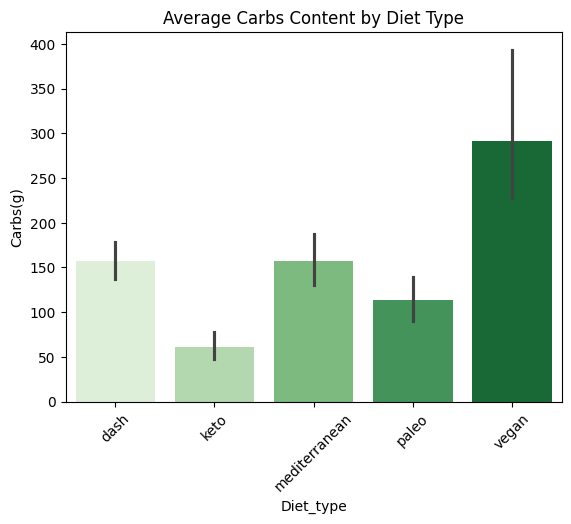

In [11]:
# Bar chart: Mean carb content by diet type
sns.barplot(x='Diet_type', y='Carbs(g)', data=grouped_df, palette="Greens")
plt.title('Average Carbs Content by Diet Type')
plt.xticks(rotation=45)
plt.show()

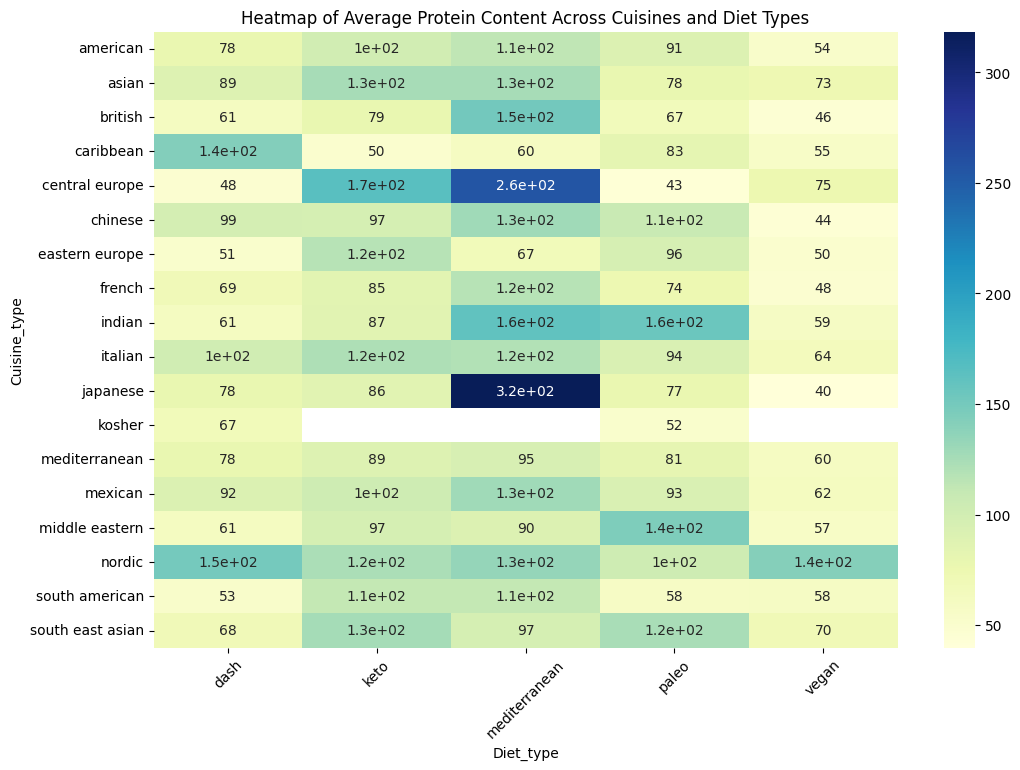

In [12]:
# Heatmap: Macronutrient distribution across different cuisines
pivot_df = grouped_df.pivot(index="Cuisine_type", columns="Diet_type", values="Protein(g)")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Average Protein Content Across Cuisines and Diet Types')
plt.xticks(rotation=45)
plt.show()

<ipython-input-13-7d98dac608f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diet_type', y='Fat(g)', data=grouped_df, palette="Reds")


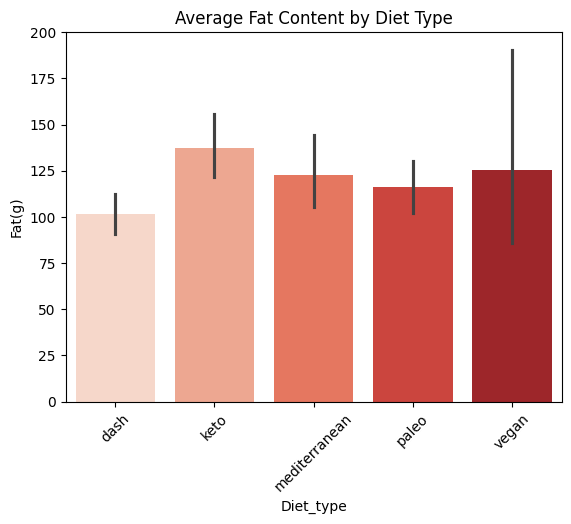

In [13]:
# Bar chart: Mean fat content by diet type
sns.barplot(x='Diet_type', y='Fat(g)', data=grouped_df, palette="Reds")
plt.title('Average Fat Content by Diet Type')
plt.xticks(rotation=45)
plt.show()

<ipython-input-14-eef0c6ddd102>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diet_type', data=df, palette='viridis')


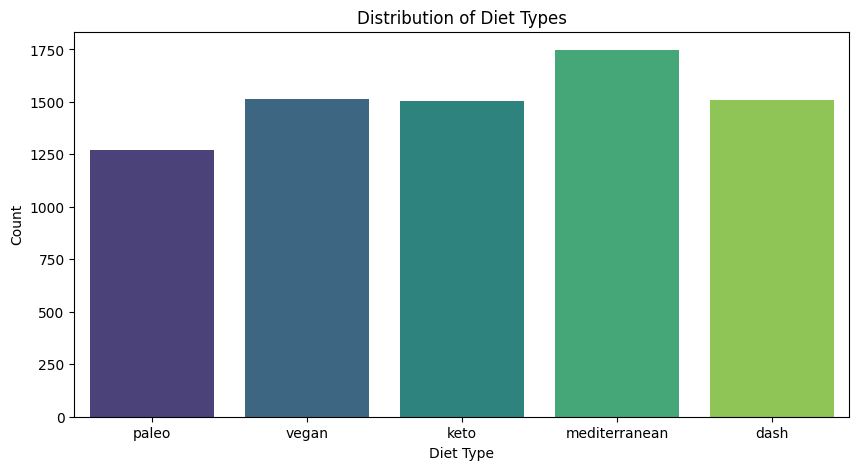

<ipython-input-14-eef0c6ddd102>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cuisine_type', data=df, palette='coolwarm')


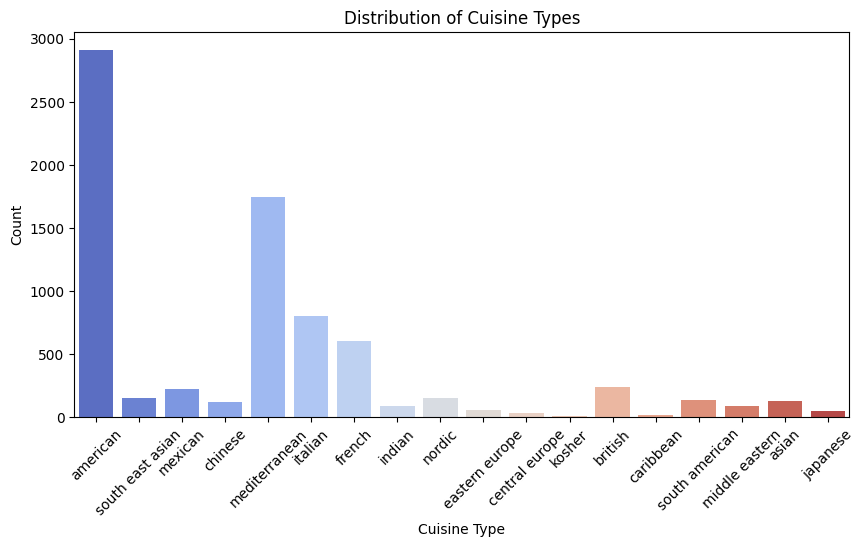

In [14]:
# Bar plot for Diet_type
plt.figure(figsize=(10, 5))
sns.countplot(x='Diet_type', data=df, palette='viridis')
plt.title('Distribution of Diet Types')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

# Bar plot for Cuisine_type
plt.figure(figsize=(10, 5))
sns.countplot(x='Cuisine_type', data=df, palette='coolwarm')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-15-2bee6e5d52c8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Protein(g)', y='Recipe_name', data=top_protein_recipes, palette='Greens')


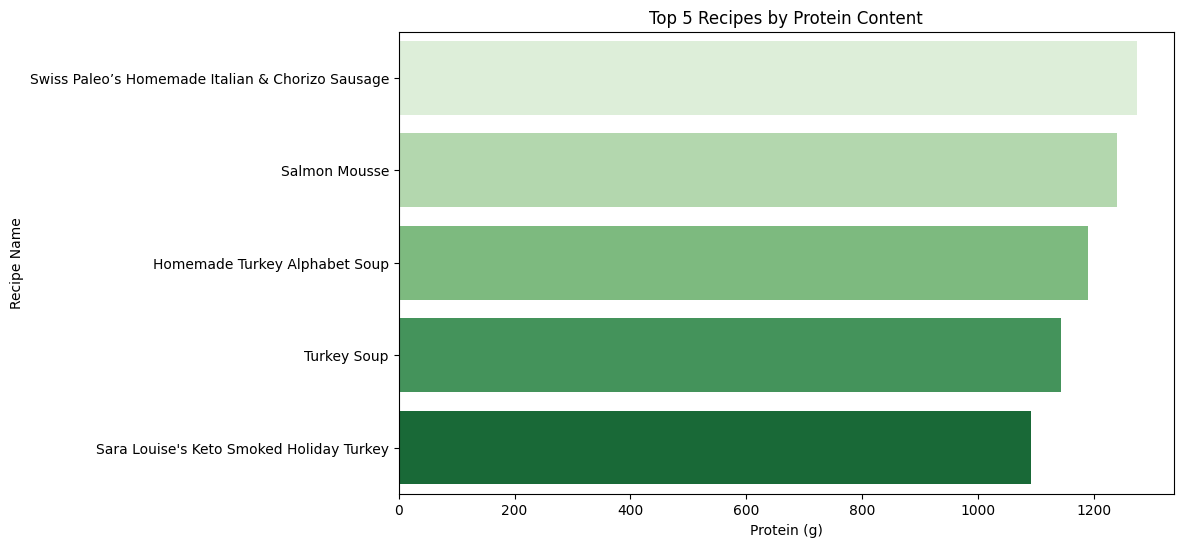

In [15]:
# Top 5 recipes with the highest Protein content
top_protein_recipes = df[['Recipe_name', 'Protein(g)']].sort_values(by='Protein(g)', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Protein(g)', y='Recipe_name', data=top_protein_recipes, palette='Greens')
plt.title('Top 5 Recipes by Protein Content')
plt.xlabel('Protein (g)')
plt.ylabel('Recipe Name')
plt.show()

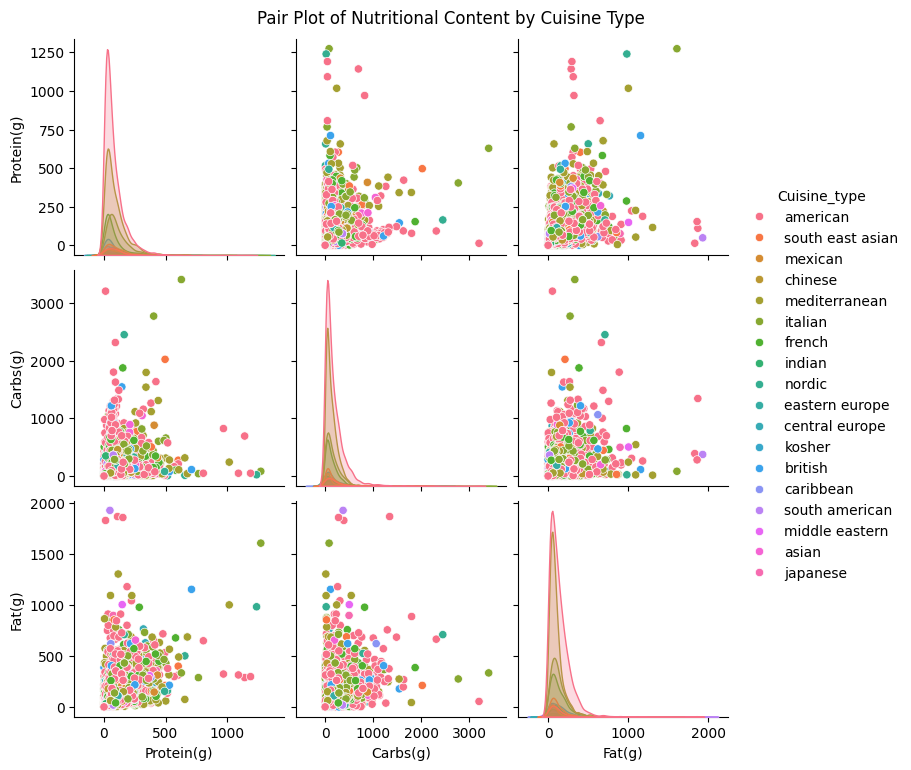

In [16]:
# Pair plot for Protein, Carbs, and Fat
sns.pairplot(df[['Protein(g)', 'Carbs(g)', 'Fat(g)', 'Cuisine_type']], hue='Cuisine_type', palette='husl')
plt.suptitle('Pair Plot of Nutritional Content by Cuisine Type', y=1.02)
plt.show()

**Nutritional-Based Clustering using K-Means and Hierarchical Clustering**

In [18]:
df_nutrition = df[['Protein(g)', 'Carbs(g)', 'Fat(g)']]
df_nutrition = df_nutrition.dropna()
df_nutrition.reset_index(drop=True, inplace=True)
print(df_nutrition.head())

   Protein(g)  Carbs(g)  Fat(g)
0        5.22      1.29    3.20
1      181.55     28.62  146.14
2       30.91    302.59   96.76
3        9.62     75.78   59.89
4       39.84     54.08   71.55


In [19]:
scaler = StandardScaler()
df_nutrition_scaled = scaler.fit_transform(df_nutrition)

print(df_nutrition_scaled[:5])

[[-0.89759872 -0.82778734 -0.96533734]
 [ 1.06121758 -0.681932    0.20372625]
 [-0.61221342  0.78019699 -0.20013803]
 [-0.84871996 -0.4302475  -0.50168675]
 [-0.51301175 -0.54605653 -0.40632309]]


In [20]:
n_clusters = 5

# Apply K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_nutrition['cluster'] = kmeans.fit_predict(df_nutrition_scaled)
print(df_nutrition.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Protein(g)  Carbs(g)  Fat(g)  cluster
0        5.22      1.29    3.20        0
1      181.55     28.62  146.14        1
2       30.91    302.59   96.76        2
3        9.62     75.78   59.89        0
4       39.84     54.08   71.55        0


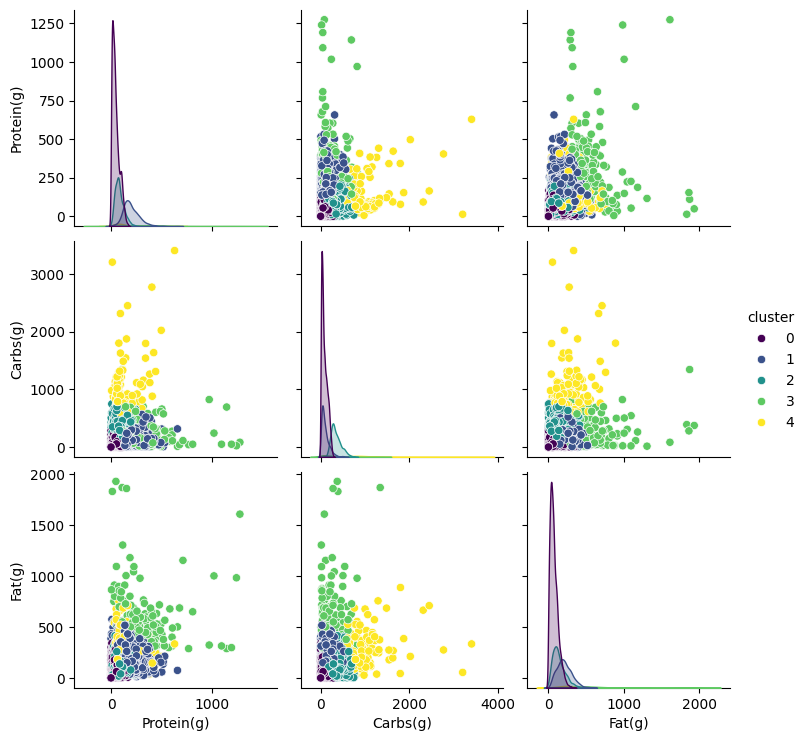

In [21]:
sns.pairplot(df_nutrition, hue='cluster', palette='viridis')
plt.show()

In [22]:
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
df_nutrition['hierarchical_cluster'] = hierarchical.fit_predict(df_nutrition_scaled)

print(df_nutrition[['Protein(g)', 'Carbs(g)', 'Fat(g)', 'hierarchical_cluster']].head())

   Protein(g)  Carbs(g)  Fat(g)  hierarchical_cluster
0        5.22      1.29    3.20                     4
1      181.55     28.62  146.14                     2
2       30.91    302.59   96.76                     3
3        9.62     75.78   59.89                     4
4       39.84     54.08   71.55                     4


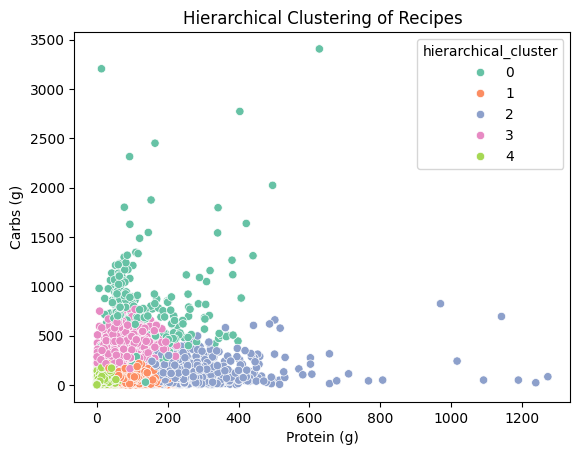

In [23]:
sns.scatterplot(x=df_nutrition['Protein(g)'], y=df_nutrition['Carbs(g)'], hue=df_nutrition['hierarchical_cluster'], palette='Set2')
plt.title('Hierarchical Clustering of Recipes')
plt.xlabel('Protein (g)')
plt.ylabel('Carbs (g)')
plt.show()

In [24]:
kmeans_silhouette = silhouette_score(df_nutrition_scaled, df_nutrition['cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

hierarchical_silhouette = silhouette_score(df_nutrition_scaled, df_nutrition['hierarchical_cluster'])
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}')

K-Means Silhouette Score: 0.3951013128323448
Hierarchical Clustering Silhouette Score: 0.27507141609325136


**Recipe Recommendation System**

In [ ]:
cuisine_encoder = OneHotEncoder(sparse=False, drop='first')
diet_encoder = OneHotEncoder(sparse=False, drop='first')

encoded_cuisine = cuisine_encoder.fit_transform(df[['Cuisine_type']])
encoded_diet = diet_encoder.fit_transform(df[['Diet_type']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Create a DataFrame for encoded features
df_encoded_cuisine = pd.DataFrame(encoded_cuisine, columns=cuisine_encoder.get_feature_names_out(['Cuisine_type']))
df_encoded_diet = pd.DataFrame(encoded_diet, columns=diet_encoder.get_feature_names_out(['Diet_type']))

In [ ]:
# Normalize numerical features
scaler = MinMaxScaler()
df[['Protein(g)', 'Carbs(g)', 'Fat(g)']] = scaler.fit_transform(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])

<ipython-input-15-07391fcd88f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Protein(g)', 'Carbs(g)', 'Fat(g)']] = scaler.fit_transform(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])


In [ ]:
# Combine all features into one DataFrame
df_features = pd.concat([df_encoded_cuisine, df_encoded_diet, df[['Protein(g)', 'Carbs(g)', 'Fat(g)']]], axis=1)

In [ ]:
indices = pd.Series(df.index, index = df["Recipe_name"]).drop_duplicates()

In [ ]:
df_features = df_features.apply(pd.to_numeric, errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_features_imputed = pd.DataFrame(imputer.fit_transform(df_features), columns=df_features.columns)
df = df.reset_index(drop=True)
df_features_imputed = df_features_imputed.reset_index(drop=True)

# Calculate similarity matrix
similarity_matrix = cosine_similarity(df_features_imputed)

similarity_df = pd.DataFrame(similarity_matrix)

In [ ]:
def get_recommendations(recipe_name, similarity_df, df, top_n=10):
    df['Recipe_name'] = df['Recipe_name'].str.strip()
    if recipe_name not in df['Recipe_name'].values:
        raise ValueError(f"'{recipe_name}' not found in the dataset")

    recipe_idx = df[df['Recipe_name'] == recipe_name].index[0]

    if recipe_idx not in similarity_df.index:
        raise ValueError("Recipe index not found in similarity matrix")

    similarity_scores = similarity_df.iloc[recipe_idx]

    similar_indices = similarity_scores.sort_values(ascending=False).index[1:top_n+1]

    similar_recipes = df.loc[similar_indices, 'Recipe_name']

    return similar_recipes

recommended_recipes = get_recommendations("Mediterranean Penne with Sausage", similarity_df, df)
print(recommended_recipes)


4603                   Mediterranean Vegetable-Cheese Pie
4452                          Mediterranean Hummus Trifle
4586                     Mediterranean Udon Salad recipes
4743    Mediterranean Grilled Chicken Salad with Hummu...
5841                            Mediterranean Filled Loaf
4591                      Mediterranean Beef Stew recipes
5161                                    Mediterranean Dip
4432                           Mediterranean Chicken Soup
5747                      Mediterranean Stuffed Swordfish
4525            Mediterranean Roasted Broccoli & Tomatoes
Name: Recipe_name, dtype: object
